In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
features = pd.read_csv('Guns (1).csv')
features.head()

,Unnamed: 0,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no


In [40]:
print('data column:',features.shape)

data column: (1173, 14)


In [48]:
import datetime

year = features['year']
population = features['population']
density = features['density']
state = features['state']

Text(0.5, 1.0, 'density')

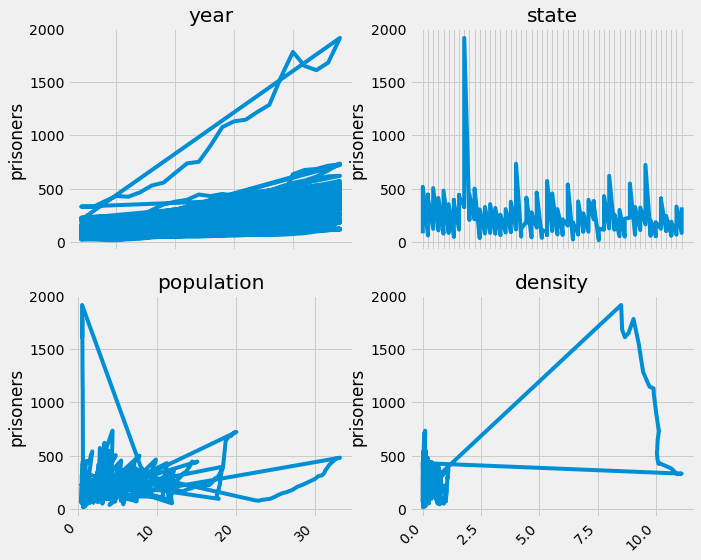

In [49]:
plt.style.use('fivethirtyeight')
fig, ((ax1,ax2),(ax3,ax4)) = plt. subplots(nrows = 2, ncols = 2, figsize=(10,10))
fig.autofmt_xdate(rotation= 45)

ax1.plot(year,features['prisoners'])
ax1.set_xlabel('');ax1.set_ylabel("prisoners"); ax1.set_title("year")
ax2.plot(state,features['prisoners'])
ax2.set_xlabel('');ax2.set_ylabel("prisoners"); ax2.set_title("state")

ax3.plot(population,features['prisoners'])
ax3.set_xlabel('');ax3.set_ylabel("prisoners"); ax3.set_title("population")
ax4.plot(density,features['prisoners'])
ax4.set_xlabel('');ax4.set_ylabel("prisoners"); ax4.set_title("density")

In [50]:
features = pd.get_dummies(features)
features.head(5)

,Unnamed: 0,year,violent,murder,robbery,prisoners,afam,cauc,male,population,...,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,law_no,law_yes
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,...,0,0,0,0,0,0,0,0,1,0
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,...,0,0,0,0,0,0,0,0,1,0
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,...,0,0,0,0,0,0,0,0,1,0
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,...,0,0,0,0,0,0,0,0,1,0
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,...,0,0,0,0,0,0,0,0,1,0


In [51]:
labels = np.array(features['prisoners'])

features= features.drop('prisoners', axis = 1)

features_list = list(features.columns)

features = np.array(features)

In [52]:
features.shape

(1173, 64)

In [53]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [59]:
x = torch.tensor(input_features,dtype = float)
y = torch.tensor(labels,dtype = float)
weights = torch.randn((64,128),dtype = float, requires_grad = True)
biases = torch.randn(128,dtype = float, requires_grad = True)
weights2 = torch.randn((128,1),dtype = float, requires_grad = True)
biases2 = torch.randn(1,dtype = float, requires_grad = True)

learning_rate = 0.001
losses = []

for i in range(1000):
    hidden = x.mm(weights) + biases
    hidden = torch.relu(hidden)
    predictions = hidden.mm(weights2) +biases2
    loss = torch.mean((predictions - y)**2)
    losses.append(loss.data.numpy())
    
    if i%100 == 0:
        print('loss:', loss)
    loss.backward()
    
    weights.data.add_(- learning_rate *weights.grad.data)
    biases.data.add_(- learning_rate *biases.grad.data)
    weights2.data.add_(- learning_rate *weights2.grad.data)
    biases2.data.add_(- learning_rate *biases2.grad.data)
    
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()
    
    

loss: tensor(50850.8668, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31989.0420, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31981.6348, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31979.1788, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31977.9415, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31977.2058, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31976.7168, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31976.3646, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31976.0994, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(31975.8875, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [63]:
input_size = input_features.shape[1]
hidden_size = 128
output_size = 1
batch_size = 64
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size,output_size),
)
cost = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim. Adam (my_nn.parameters(), lr = 0.001)

In [64]:
losses = []
for i in range(1000):
    batch_loss =[]
    for start in range(0, len(input_features),batch_size):
        end = start +batch_size if start +batch_size < len(input_features) else len(input_features)
        xx = torch.tensor (input_features[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor (labels[start:end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction,yy)
        optimizer.zero_grad()
        loss.backward(retain_graph = True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())
        
        if i % 100 == 0:
            losses.append(np.mean(batch_loss))
            print(i,np.mean(batch_loss))
        
        
        
        

0 94075.14
0 83737.125
0 85770.83
0 187259.78
0 156929.38
0 136410.95
0 129557.1
0 119197.71
0 113627.266
0 106167.95
0 102711.58
0 99097.27
0 95328.51
0 93549.96
0 91809.82
0 90952.445
0 87813.44
0 84111.125
0 82068.56
100 24793.568
100 23223.207
100 23511.928
100 100752.02
100 81852.695
100 69183.92
100 63897.71
100 57413.793
100 53804.785
100 49320.875
100 47119.66
100 44084.66
100 41939.793
100 40531.02
100 39325.504
100 38592.387
100 36858.547
100 35029.977
100 33484.67
200 14934.269
200 16487.596
200 16144.95
200 84714.5
200 69179.8
200 58617.94
200 54048.22
200 48759.89
200 45883.754
200 42152.06
200 40434.598
200 37700.33
200 36015.87
200 34809.867
200 33839.504
200 33211.94
200 31773.32
200 30216.053
200 28903.172
300 14036.878
300 16132.1
300 15778.863
300 79924.086
300 65247.863
300 55326.324
300 51241.23
300 46274.203
300 43663.49
300 40152.324
300 38606.28
300 36016.836
300 34448.504
300 33353.555
300 32475.129
300 31931.645
300 30561.326
300 29068.076
300 27814.957
400 14

In [66]:
x = torch.tensor(input_features, dtype = torch.float)
predict = my_nn(x).data.numpy()
true_data = pd.DataFrame(data = {'data' : year,'actual' : labels})


In [4]:
plt.plot(x[year],x['prisoners'],'b-',label = 'prisoners')

NameError: name 'x' is not defined